pta指数
塑料指数
橡胶指数
沪铜指数
沪锌指数
白糖指数
螺纹钢指数
豆油指数
豆粕指数
铁矿石指数
           pta指数      塑料指数      橡胶指数      沪铜指数      沪锌指数      白糖指数     螺纹钢指数   
ma      0.720217  0.325324  0.848097  0.463238 -0.044636  0.046036  0.559515  \
bbands  0.501586  0.319729  0.592788  0.581256 -0.070337  0.268739  0.598499   
obv     1.065330  0.609745  0.398083  0.505869 -0.111825  0.155028  0.501206   
macd    0.705180  0.451072  0.812522  0.506728  0.210469 -0.005937  0.552775   
rsi     0.675127  0.471462  0.487337  0.320286  0.177721 -0.051072  0.034248   
kdj     0.519423  0.385779  0.651000  0.294620 -0.043445  0.069574  0.420821   
sar     0.960047  0.334994  0.788170  0.588352 -0.153518 -0.034367  0.565709   
roc     0.358835  0.111732  0.730528  0.505835 -0.087840  0.164504  0.200469   
dema    0.735473  0.434480  0.811360  0.463362  0.168106  0.032830  0.503349   
cci     0.749351  0.055254  0.784562  0.621901  0.114206  0.094614  0.678024   

            豆油指数      豆粕指数     铁矿石指数  
ma      0.125824  0.260421 

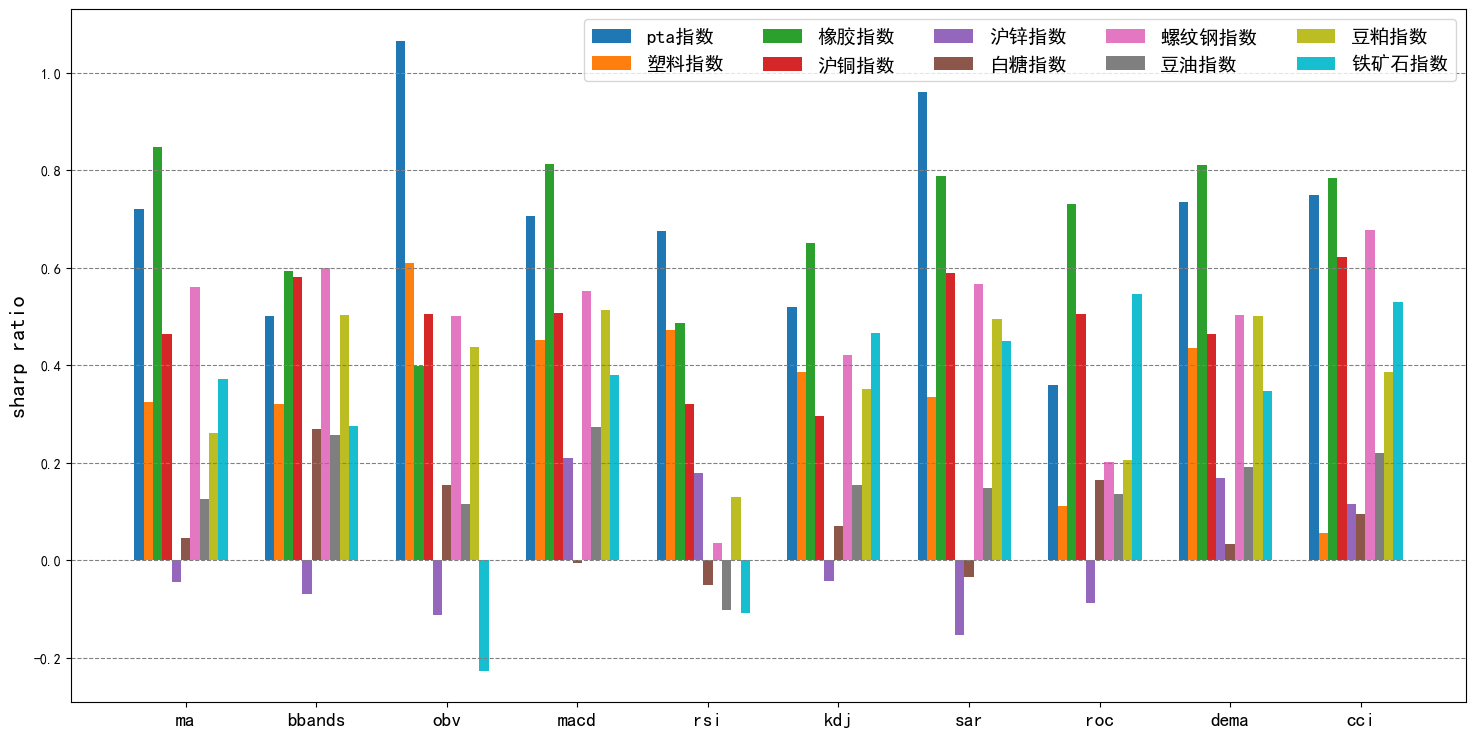

In [1]:
# coding:utf-8
import pathlib

import pandas as pd
import numpy as np

import talib as ta

import matplotlib.pyplot as plt


plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号


def ma(dir):
    df = pd.read_excel(dir)
    df = df.dropna()
    # df["日期"] = pd.to_datetime(df["日期"])
    df["return"] = np.log(df["收盘价(元)"].pct_change(1) + 1).replace([np.nan, -np.inf, np.inf], 0)  # 对数收益率
    # 均线
    df["ma5"] = ta.MA(df["收盘价(元)"], 5)
    df["ma10"] = ta.MA(df["收盘价(元)"], 10)
    # ATR
    k = 1
    df["ATR"] = ta.ATR(df['最高价(元)'], df['最低价(元)'], df['收盘价(元)'])
    df["ATR1"] = df["ma5"] - k * df["ATR"]
    df["ATR2"] = df["ma5"] + k * df["ATR"]
    
    condition1 = df["ma5"]>=df["ma10"]  # 金叉
    condition2 = df["ma5"]<df["ma10"]  # 死叉
    condition3 = df["收盘价(元)"] > df["ATR1"]  # 多头 ATR平仓
    condition4 = df["收盘价(元)"] < df["ATR2"]  # 空头 ATR平仓

    df["long"] = condition1 & condition3
    df["long"] = df["long"].shift(1).fillna(False)
    
    df["short"] = condition2 & condition4
    df["short"] = df["short"].shift(1).fillna(False)
    df["ret"] = df["return"] * df["long"] - df["return"] * df["short"]
    # plt.plot(np.exp(df["ret"].cumsum()))
    return {"ma":df["ret"].mean() / df["ret"].std() * 252**0.5}


def bbands(dir):
    df = pd.read_excel(dir)
    df = df.dropna()
    # df["日期"] = pd.to_datetime(df["日期"])
    df["return"] = np.log(df["收盘价(元)"].pct_change(1) + 1).replace([np.nan, -np.inf, np.inf], 0)  # 对数收益率
    # 布林线
    df["mid"], df["upper"], df["lower"] = ta.BBANDS(df["收盘价(元)"], 20, 2, 2)
    # ATR
    k = 1
    df["ma5"] = ta.MA(df["收盘价(元)"], 5)
    df["ATR"] = ta.ATR(df['最高价(元)'], df['最低价(元)'], df['收盘价(元)'])
    df["ATR1"] = df["ma5"] - k * df["ATR"]
    df["ATR2"] = df["ma5"] + k * df["ATR"]

    condition1 = df["收盘价(元)"]>=df["upper"]
    condition2 = []
    # 上穿下轨买入，上穿上轨卖出
    for i in range(df["收盘价(元)"].shape[0]):
        try:
            if condition2[i-1] == 0:
                if df["收盘价(元)"][i]>=df["lower"][i] and df["收盘价(元)"][i-1]<df["lower"][i-1]:
                    # 上穿下轨
                    condition2.append(1)
                else:
                    condition2.append(0)
            else:
                if df["收盘价(元)"][i]>=df["upper"][i] and df["收盘价(元)"][i-1]<df["upper"][i-1]:
                    # if df["收盘价(元)"][i]<df["upper"][i] and df["收盘价(元)"][i-1]>=df["upper"][i-1]:
                    # 上穿上轨
                    condition2.append(0)
                else:
                    condition2.append(1)
        except:
            condition2.append(0)
    condition2 = np.array(condition2)

    condition3 = df["收盘价(元)"]<=df["lower"]
    condition4 = df["收盘价(元)"] > df["ATR1"]  # 多头 ATR平仓
    condition5 = df["收盘价(元)"] < df["ATR2"]  # 空头 ATR平仓

    df["long"] = condition1 & condition4
    df["long"] = df["long"].shift(1).fillna(False)

    df["short"] = condition3 & condition5
    df["short"] = df["short"].shift(1).fillna(False)

    df["ret"] = df["return"] * df["long"] - df["return"] * df["short"]
    # plt.plot(np.exp(df["ret"].cumsum()))
    return {"bbands":df["ret"].mean() / df["ret"].std() * 252**0.5}


def obv(dir):
    df = pd.read_excel(dir)
    df = df.dropna()
    # df["日期"] = pd.to_datetime(df["日期"])
    df["return"] = np.log(df["收盘价(元)"].pct_change(1) + 1).replace([np.nan, -np.inf, np.inf], 0)  # 对数收益率
    # obv
    df["OBV"] = ta.OBV(df["收盘价(元)"], df["成交量(股)"])
    df["OBV_ma"] = ta.MA(df["OBV"], 20)
    # ATR
    k = 1
    df["ma5"] = ta.MA(df["收盘价(元)"], 5)
    df["ATR"] = ta.ATR(df['最高价(元)'], df['最低价(元)'], df['收盘价(元)'])
    df["ATR1"] = df["ma5"] - k * df["ATR"]
    df["ATR2"] = df["ma5"] + k * df["ATR"]

    condition1 = df["OBV"]>=df["OBV_ma"]
    condition2 = df["OBV"]<df["OBV_ma"]
    condition3 = df["收盘价(元)"] > df["ATR1"]  # 多头 ATR平仓
    condition4 = df["收盘价(元)"] < df["ATR2"]  # 空头 ATR平仓

    df["long"] = condition1 & condition3
    df["long"] = df["long"].shift(1).fillna(False)

    df["short"] = condition2 & condition4
    df["short"] = df["short"].shift(1).fillna(False)

    df["ret"] = df["return"] * df["long"] - df["return"] * df["short"]
    # plt.plot(np.exp(df["ret"].cumsum()))
    return {"obv":df["ret"].mean() / df["ret"].std() * 252**0.5}


def macd(dir):
    df = pd.read_excel(dir)
    df = df.dropna()
    # df["日期"] = pd.to_datetime(df["日期"])
    df["return"] = np.log(df["收盘价(元)"].pct_change(1) + 1).replace([np.nan, -np.inf, np.inf], 0)  # 对数收益率
    # macd
    df["diff"], df["dea"], df["macd"] = ta.MACD(df["收盘价(元)"], 12, 26, 9)
    df = df.replace([np.nan, -np.inf, np.inf], 0)
    # 12期变化率
    df["ma12"] = ta.MA(df["收盘价(元)"], 12)
    df["return12"] = (df["ma12"].pct_change(4))
    df["macd12"] = (df["macd"].pct_change(4))
    df = df.replace([np.nan, -np.inf, np.inf], 0)
    # ATR
    k = 1
    df["ma5"] = ta.MA(df["收盘价(元)"], 5)
    df["ATR"] = ta.ATR(df['最高价(元)'], df['最低价(元)'], df['收盘价(元)'])
    df["ATR1"] = df["ma5"] - k * df["ATR"]
    df["ATR2"] = df["ma5"] + k * df["ATR"]


    condition1 = df["diff"]>=df["dea"]  # 金叉
    condition2 = (df["return12"]<=0) * (df["macd12"]>=0) # 底背离
    condition3 = df["diff"]<df["dea"]  # 死叉
    condition4 = df["收盘价(元)"] > df["ATR1"]  # 多头 ATR平仓
    condition5 = df["收盘价(元)"] < df["ATR2"]  # 空头 ATR平仓

    df["long"] = condition1 & condition4
    df["long"] = df["long"].shift(1).fillna(False)

    df["short"] = condition3 & condition5
    df["short"] = df["short"].shift(1).fillna(False)

    df["ret"] = df["return"] * df["long"] - df["return"] * df["short"]
    # plt.plot(np.exp(df["ret"].cumsum()))
    return {"macd":df["ret"].mean() / df["ret"].std() * 252**0.5}


def rsi(dir):
    df = pd.read_excel(dir)
    df = df.dropna()
    # df["日期"] = pd.to_datetime(df["日期"])
    df["return"] = np.log(df["收盘价(元)"].pct_change(1) + 1).replace([np.nan, -np.inf, np.inf], 0)  # 对数收益率
    # rsi
    df["rsi"] = ta.RSI(df["收盘价(元)"])
    df = df.replace([np.nan, -np.inf, np.inf], 0)
    # ATR
    k = 1
    df["ma5"] = ta.MA(df["收盘价(元)"], 5)
    df["ATR"] = ta.ATR(df['最高价(元)'], df['最低价(元)'], df['收盘价(元)'])
    df["ATR1"] = df["ma5"] - k * df["ATR"]
    df["ATR2"] = df["ma5"] + k * df["ATR"]

    condition1 = df["rsi"] <= 20  # 超卖
    condition2 = (df["rsi"] > 50) & (df["rsi"] < 80)   # 多头区间
    condition3 = df["rsi"] >= 80   # 超买
    condition4 = df["收盘价(元)"] > df["ATR1"]  # 多头 ATR平仓
    condition5 = df["收盘价(元)"] < df["ATR2"]  # 空头 ATR平仓

    df["long"] = condition3 & condition4
    df["long"] = df["long"].shift(1).fillna(False)

    df["short"] = condition1 & condition5
    df["short"] = df["short"].shift(1).fillna(False)

    df["ret"] = df["return"] * df["long"] - df["return"] * df["short"]
    # plt.plot(np.exp(df["ret"].cumsum()))
    return {"rsi":df["ret"].mean() / df["ret"].std() * 252**0.5}


def kdj(dir):
    df = pd.read_excel(dir)
    df = df.dropna()
    # df["日期"] = pd.to_datetime(df["日期"])
    df["return"] = np.log(df["收盘价(元)"].pct_change(1) + 1).replace([np.nan, -np.inf, np.inf], 0)  # 对数收益率
    # kdj
    df["kdj_k"], df["kdj_d"] = ta.STOCH(df['最高价(元)'], df['最低价(元)'], df['收盘价(元)'],
                                                        fastk_period=9, slowk_period=5, slowk_matype=1, slowd_period=5,
                                                        slowd_matype=1)
    df = df.replace([np.nan, -np.inf, np.inf], 0)
    # ATR
    k = 1
    df["ma5"] = ta.MA(df["收盘价(元)"], 5)
    df["ATR"] = ta.ATR(df['最高价(元)'], df['最低价(元)'], df['收盘价(元)'])
    df["ATR1"] = df["ma5"] - k * df["ATR"]
    df["ATR2"] = df["ma5"] + k * df["ATR"]

    condition1 = df["kdj_k"] >= df["kdj_d"]  # 金叉
    condition2 = df["kdj_d"] <= 20   # 超卖
    condition3 = df["kdj_d"] >= 80   # 超买
    condition4 = df["kdj_k"] < df["kdj_d"]  # 死叉
    condition5 = df["收盘价(元)"] > df["ATR1"]  # 多头 ATR平仓
    condition6 = df["收盘价(元)"] < df["ATR2"]  # 空头 ATR平仓

    df["long"] = condition3 & condition5
    df["long"] = df["long"].shift(1).fillna(False)

    df["short"] = condition4 & condition6
    df["short"] = df["short"].shift(1).fillna(False)

    df["ret"] = df["return"] * df["long"] - df["return"] * df["short"]
    # plt.plot(np.exp(df["ret"].cumsum()))
    return {"kdj":df["ret"].mean() / df["ret"].std() * 252**0.5}


def sar(dir):
    df = pd.read_excel(dir)
    df = df.dropna()
    # df["日期"] = pd.to_datetime(df["日期"])
    df["return"] = np.log(df["收盘价(元)"].pct_change(1) + 1).replace([np.nan, -np.inf, np.inf], 0)  # 对数收益率
    # sar
    df["sar"] = ta.SAR(df['最高价(元)'], df['最低价(元)'])
    df = df.replace([np.nan, -np.inf, np.inf], 0)
    # ATR
    k = 1
    df["ma5"] = ta.MA(df["收盘价(元)"], 5)
    df["ATR"] = ta.ATR(df['最高价(元)'], df['最低价(元)'], df['收盘价(元)'])
    df["ATR1"] = df["ma5"] - k * df["ATR"]
    df["ATR2"] = df["ma5"] + k * df["ATR"]

    condition1 = df["收盘价(元)"] >= df["sar"]  # 多头
    condition2 = df["收盘价(元)"] < df["sar"]  # 空头
    condition3 = df["收盘价(元)"] > df["ATR1"]  # 多头 ATR平仓
    condition4 = df["收盘价(元)"] < df["ATR2"]  # 空头 ATR平仓

    df["long"] = condition1 & condition3
    df["long"] = df["long"].shift(1).fillna(False)

    df["short"] = condition2 & condition4
    df["short"] = df["short"].shift(1).fillna(False)

    df["ret"] = df["return"] * df["long"] - df["return"] * df["short"]
    # plt.plot(np.exp(df["ret"].cumsum()))
    return {"sar":df["ret"].mean() / df["ret"].std() * 252**0.5}


def roc(dir):
    df = pd.read_excel(dir)
    df = df.dropna()
    # df["日期"] = pd.to_datetime(df["日期"])
    df["return"] = np.log(df["收盘价(元)"].pct_change(1) + 1).replace([np.nan, -np.inf, np.inf], 0)  # 对数收益率
    # roc
    df["change"] = ta.ROC(df["收盘价(元)"], 4)
    df["change_ma"] = ta.MA(df["change"], 12)
    df = df.replace([np.nan, -np.inf, np.inf], 0)
    # ATR
    k = 1
    df["ma5"] = ta.MA(df["收盘价(元)"], 5)
    df["ATR"] = ta.ATR(df['最高价(元)'], df['最低价(元)'], df['收盘价(元)'])
    df["ATR1"] = df["ma5"] - k * df["ATR"]
    df["ATR2"] = df["ma5"] + k * df["ATR"]

    condition1 = df["change"] >= 5  # 最近5天涨幅大于5%
    condition2 = df["change"] <= -5  # 最近5天跌幅小于-5%
    condition3 = df["change"] >= df["change_ma"]  # 金叉
    condition4 = df["change"] >= df["change_ma"]  # 死叉
    condition5 = df["收盘价(元)"] > df["ATR1"]  # 多头 ATR平仓
    condition6 = df["收盘价(元)"] < df["ATR2"]  # 空头 ATR平仓

    df["long"] = condition1 | condition3 & condition5
    df["long"] = df["long"].shift(1).fillna(False)

    df["short"] = condition2 | condition4 & condition6
    df["short"] = df["short"].shift(1).fillna(False)

    df["ret"] = df["return"] * df["long"] - df["return"] * df["short"]
    # plt.plot(np.exp(df["ret"].cumsum()))
    return {"roc":df["ret"].mean() / df["ret"].std() * 252**0.5}


def dema(dir):
    df = pd.read_excel(dir)
    df = df.dropna()
    # df["日期"] = pd.to_datetime(df["日期"])
    df["return"] = np.log(df["收盘价(元)"].pct_change(1) + 1).replace([np.nan, -np.inf, np.inf], 0)  # 对数收益率
    # dema
    df["dema_10"] = ta.DEMA(df["收盘价(元)"], 10)
    df["dema_20"] = ta.DEMA(df["收盘价(元)"], 20)
    df = df.replace([np.nan, -np.inf, np.inf], 0)
    # ATR
    k = 1
    df["ma5"] = ta.MA(df["收盘价(元)"], 5)
    df["ATR"] = ta.ATR(df['最高价(元)'], df['最低价(元)'], df['收盘价(元)'])
    df["ATR1"] = df["ma5"] - k * df["ATR"]
    df["ATR2"] = df["ma5"] + k * df["ATR"]

    condition1 = df["dema_10"] >= df["dema_20"]  # 金叉
    condition2 = df["dema_10"] < df["dema_20"]  # 死叉
    condition3 = df["收盘价(元)"] > df["ATR1"]  # 多头 ATR平仓
    condition4 = df["收盘价(元)"] < df["ATR2"]  # 空头 ATR平仓

    df["long"] = condition1 & condition3
    df["long"] = df["long"].shift(1).fillna(False)

    df["short"] = condition2 & condition4
    df["short"] = df["short"].shift(1).fillna(False)

    df["ret"] = df["return"] * df["long"] - df["return"] * df["short"]
    # plt.plot(np.exp(df["ret"].cumsum()))
    return {"dema":df["ret"].mean() / df["ret"].std() * 252**0.5}


def cci(dir):
    df = pd.read_excel(dir)
    df = df.dropna()
    # df["日期"] = pd.to_datetime(df["日期"])
    df["return"] = np.log(df["收盘价(元)"].pct_change(1) + 1).replace([np.nan, -np.inf, np.inf], 0)  # 对数收益率
    # cci
    df["cci"] = ta.CCI(df['最高价(元)'], df['最低价(元)'], df['收盘价(元)'])
    df = df.replace([np.nan, -np.inf, np.inf], 0)
    # ATR
    k = 1
    df["ma5"] = ta.MA(df["收盘价(元)"], 5)
    df["ATR"] = ta.ATR(df['最高价(元)'], df['最低价(元)'], df['收盘价(元)'])
    df["ATR1"] = df["ma5"] - k * df["ATR"]
    df["ATR2"] = df["ma5"] + k * df["ATR"]

    condition1 = df["cci"] >= 100  # 超买
    condition2 = df["cci"] <= -100  # 超卖
    condition3 = []
    # cci正常用法 上穿-100买入，上穿100卖出
    for i in range(df["cci"].shape[0]):
        try:
            if condition3[i-1] == 0:
                if df["cci"][i]>=-100 and df["cci"][i-1]<-100:
                    # 上穿-100
                    condition3.append(1)
                else:
                    condition3.append(0)
            else:
                if df["cci"][i]>=100 and df["cci"][i-1]<100:
                    # 上穿100
                    condition3.append(0)
                else:
                    condition3.append(1)
        except:
            condition3.append(0)
    condition3 = np.array(condition3)
    condition4 = df["收盘价(元)"] > df["ATR1"]  # 多头 ATR平仓
    condition5 = df["收盘价(元)"] < df["ATR2"]  # 空头 ATR平仓

    df["long"] = condition1 & condition4
    df["long"] = df["long"].shift(1).fillna(False)

    df["short"] = condition2 & condition5
    df["short"] = df["short"].shift(1).fillna(False)

    df["ret"] = df["return"] * df["long"] - df["return"] * df["short"]
    # plt.plot(np.exp(df["ret"].cumsum()))
    return {"cci":df["ret"].mean() / df["ret"].std() * 252**0.5}


if __name__ == "__main__":
    # 回测
    dir = pathlib.Path(r".\十种大宗商品指数文件")
    sharp = {}
    technical = [ma, bbands, obv, macd, rsi, kdj, sar, roc, dema, cci]  # 技术指标
    for d in dir.iterdir():
        print(d.stem)
        sharp[d.stem] = {}

        for f in technical:
            sharp[d.stem].update(f(d))
    sharp = pd.DataFrame(sharp)
    print(sharp)
    
    # 可视化
    fig, ax = plt.subplots(1,1,figsize=(18, 9))
    x = np.arange(0, sharp.index.shape[0])
    space = 4
    width = 1/(sharp.index.shape[0] + space)
    multiplier = 0
    for c in sharp.columns:
        ax.bar(x + multiplier * width, sharp[c], width, label=c)
        multiplier += 1
    ax.grid(axis="y", color="grey", linestyle="--")
    ax.legend(ncols=5, fontsize=14)
    # ax.set_xticks(x + 0.5-0.5*space*width, sharp.index, fontsize=14)
    ax.set_xticks(x + sharp.index.shape[0] / (sharp.index.shape[0]+space) * 0.5, sharp.index, fontsize=14)
    ax.set_ylabel("Sharp ratio", fontsize=16)
    # plt.show()
    # plt.close("all")

    # df["slope"] = ta.LINEARREG_SLOPE(df["收盘价(元)"])  # slope